In [201]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from  sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
dataset=pd.read_csv("gld_price_data.csv")

In [203]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [204]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [205]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [206]:
dataset.shape

(2290, 6)

In [207]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [208]:
dataset.tail()# to get the last rows of data

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [209]:
numerical_dataset=dataset.select_dtypes(include=["int64","float64"])

correlation=numerical_dataset.corr()
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: >

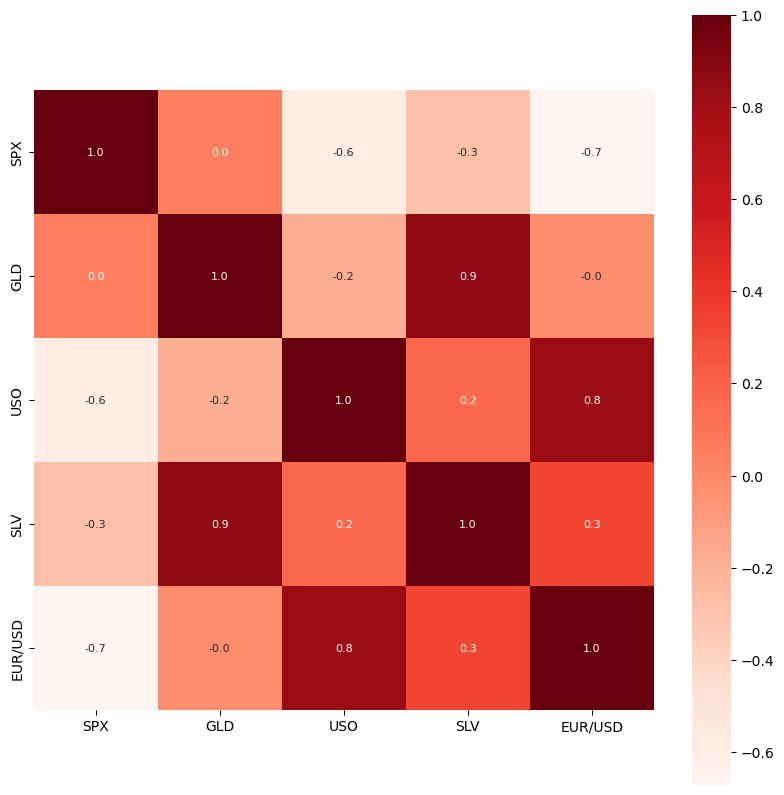

In [210]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Reds")

In [211]:
# checking the distrtibution of the gold price

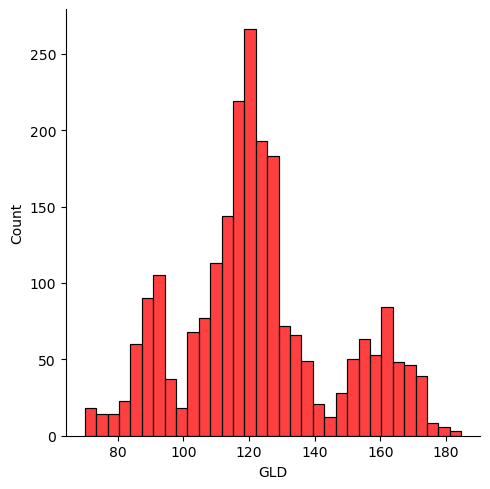

In [212]:
sns.displot(dataset["GLD"],color='red')

In [213]:
lb=LabelEncoder()
dataset["Date"]=lb.fit_transform(dataset["Date"])

In [214]:
X=dataset.drop(columns=["GLD"],axis=1)
Y=dataset["GLD"]

In [215]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [216]:
X

,Date,SPX,USO,SLV,EUR/USD
0,70,1447.160034,78.470001,15.1800,1.471692
1,152,1447.160034,78.370003,15.2850,1.474491
2,174,1411.630005,77.309998,15.1670,1.475492
3,198,1416.180054,75.500000,15.0530,1.468299
4,206,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,1615,2671.919922,14.060000,15.5100,1.186789
2286,1621,2697.790039,14.370000,15.5300,1.184722
2287,1459,2723.070068,14.410000,15.7400,1.191753
2288,1485,2730.129883,14.380000,15.5600,1.193118


In [217]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [218]:
print(X_train.shape,X_test.shape,Y_test.shape,Y_train.shape)

(1832, 5) (458, 5) (458,) (1832,)


In [219]:
regr=RandomForestRegressor()

In [220]:
regr.fit(X_train,Y_train)

RandomForestRegressor()

In [221]:
X_train_pred=regr.predict(X_train)
r2_score(X_train_pred,Y_train)

0.9988313701261321

In [222]:
X_test_pred=regr.predict(X_test)
r2_score(X_test_pred,Y_test)#r2_score is basically the error score

0.9941048406853306

In [223]:
#compare the actuall and predicted values in plot

In [224]:
Y_test=list(Y_test)

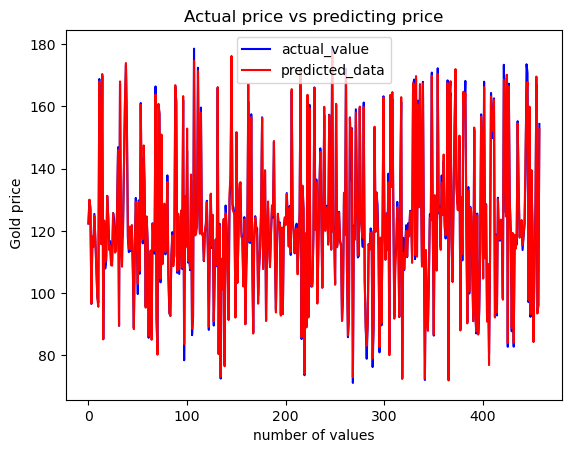

In [225]:
plt.plot(Y_test, color="blue",label="actual_value")
plt.plot(X_test_pred,color="red",label="predicted_data")
plt.title("Actual price vs predicting price")

plt.xlabel("number of values")
plt.ylabel(" Gold price")
plt.legend()
plt.show()